# Machine Learning on PGA Tour - Classification

In this notebook I am going to combine all the stages of the machine learning problem to predict the PGA Tour results using two classification methods.

In [106]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
sns.set()

Read the data:

In [107]:
df = pd.read_csv("../data/pga_data.csv")
df.head(5)

,Name,Season,Ranking,Driving Distance,Driving Accuracy,Club Head Speed,Ball Speed,Spin Rate,Eligible
0,Rory McIlroy,2016,1,304.9,61.80,119.62,179.01,2435.6,1.0
1,Dustin Johnson,2016,2,313.9,56.85,122.38,181.75,2685.6,1.0
2,Patrick Reed,2016,3,296.7,56.68,118.37,172.95,2936.1,1.0
3,Adam Scott,2016,4,303.9,55.71,119.05,179.21,2507.4,1.0
4,Paul Casey,2016,5,294.0,64.41,117.46,173.41,2473.3,1.0


First we split the data into testing and remaining data sets.

In [108]:
# Testing data set
X_test = df[df["Season"] == 2021].iloc[:, 3:8].to_numpy()
y_test = df[df["Season"] == 2021].iloc[:, 8].to_numpy()

# Training and validation data set
X_rem = df[df["Season"] != 2021].iloc[:, 3:8].to_numpy()
y_rem = df[df["Season"] != 2021].iloc[:, 8].to_numpy()

Function for data augmentation:

In [109]:
def augment_data(X, y):
    aug_X = []
    aug_y = []
    for i in range(X.shape[0]):
        if y[i] == 1:
            for _ in range(3):
                perturbations = np.random.standard_normal(5)
                aug_X.append(X[i] + perturbations)
                aug_y.append(1)
        else:
            aug_X.append(X[i])
            aug_y.append(y[i])
    return np.array(aug_X), np.array(aug_y)

### Logistic Regression

We train the model using cross-validation for parameter tuning:

In [114]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

lr_validation_accuracies = []
lr_validation_f1s = []

lr_training_accuracies = []
lr_training_f1s = []

for train_index, val_index in cv.split(y_rem):
    X_train, X_val = X_rem[train_index], X_rem[val_index]
    y_train, y_val = y_rem[train_index], y_rem[val_index]

    # AUGMENT THE TRAINING DATA
    X_train_aug, y_train_aug = augment_data(X_train, y_train)

    # STANDARDIZE
    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(X_train_aug)
    
    # MACHINE LEARNING MODEL
    lr = LogisticRegression()
    lr.fit(X_train_final, y_train_aug)

    # TRAINING ERROR
    y_pred_train = lr.predict(X_train_final)

    accuracy_train = metrics.accuracy_score(y_train_aug, y_pred_train)
    f1_train = metrics.f1_score(y_train_aug, y_pred_train)
    lr_training_accuracies.append(accuracy_train)
    lr_training_f1s.append(f1_train)

    # VALIDATION ERROR
    X_val_final = scaler.transform(X_val)
    y_pred_val = lr.predict(X_val_final)

    accuracy = metrics.accuracy_score(y_val, y_pred_val)
    f1 = metrics.f1_score(y_val, y_pred_val)
    lr_validation_accuracies.append(accuracy)
    lr_validation_f1s.append(f1)

In [115]:
np.mean(lr_training_f1s), np.mean(lr_validation_f1s)

(0.6476999498727947, 0.475773239302651)

In [116]:
np.mean(lr_training_accuracies), np.mean(lr_validation_accuracies)

(0.6599047810485252, 0.6650406504065041)

### Decision Tree

Again we train and validate the model using cross-validation.

In [118]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

dt_validation_accuracies = []
dt_validation_f1s = []

dt_training_accuracies = []
dt_training_f1s = []

for train_index, val_index in cv.split(y_rem):
    X_train, X_val = X_rem[train_index], X_rem[val_index]
    y_train, y_val = y_rem[train_index], y_rem[val_index]

    # AUGMENT THE TRAINING DATA
    X_train_aug, y_train_aug = augment_data(X_train, y_train)

    # STANDARDIZE
    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(X_train_aug)
    
    
    # MACHINE LEARNING MODEL
    dt = DecisionTreeClassifier(random_state=42, max_depth=4, criterion="gini")
    dt.fit(X_train_final, y_train_aug)

    # TRAINING ERROR
    y_pred_train = dt.predict(X_train_final)
    accuracy_train = metrics.accuracy_score(y_train_aug, y_pred_train)
    f1_train = metrics.f1_score(y_train_aug, y_pred_train)
    
    dt_training_accuracies.append(accuracy_train)
    dt_training_f1s.append(f1_train)

    # VALIDATION ERROR
    X_val_final = scaler.transform(X_val)
    y_pred_val = dt.predict(X_val_final)

    accuracy = metrics.accuracy_score(y_val, y_pred_val)
    f1 = metrics.f1_score(y_val, y_pred_val)

    dt_validation_accuracies.append(accuracy)
    dt_validation_f1s.append(f1)


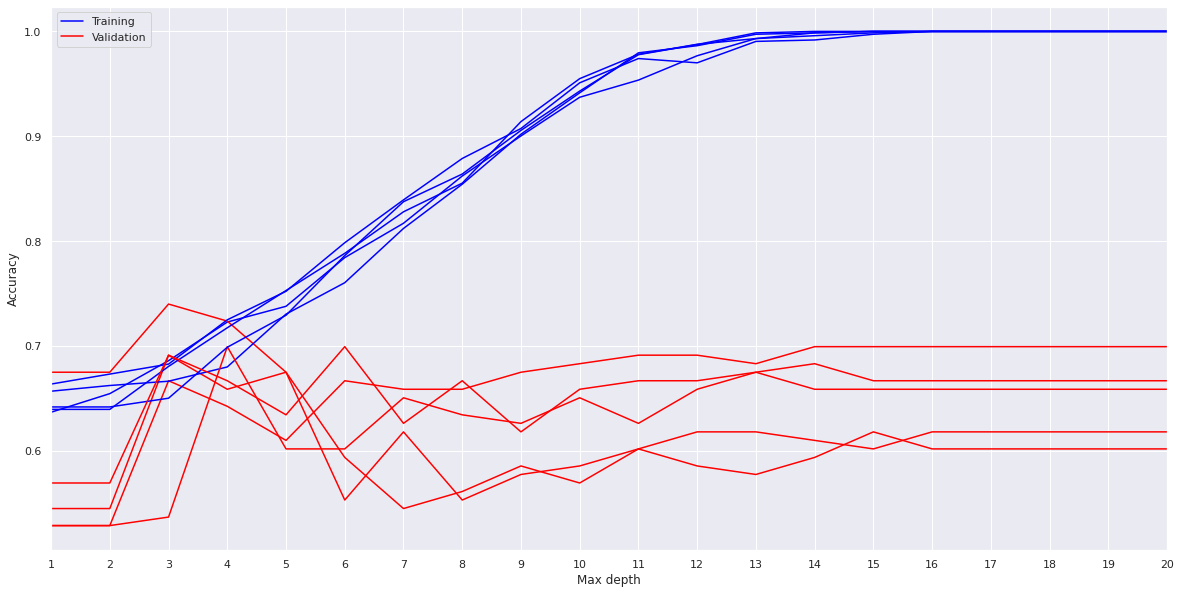

In [93]:
plt.figure(figsize=(20, 10))
j = 0
for dt_training_accuracies, dt_validation_accuracies in zip(all_dt_training_accuracies, all_dt_validation_accuracies):
    if j == 0:
        plt.plot([i for i in range(1, 21)], dt_training_accuracies, label="Training", color="blue")
        plt.plot([i for i in range(1, 21)], dt_validation_accuracies, label="Validation", color="red")
        j = 1
    else:
        plt.plot([i for i in range(1, 21)], dt_training_accuracies, color="blue")
        plt.plot([i for i in range(1, 21)], dt_validation_accuracies, color="red")
plt.xticks([i for i in range(1, 21)])
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.xlim(1, 20)
plt.legend();

In [119]:
np.mean(dt_training_f1s), np.mean(dt_validation_f1s)

(0.7113850191629609, 0.42844936399919603)

In [120]:
np.mean(dt_training_accuracies), np.mean(dt_validation_accuracies)

(0.705421623660557, 0.608130081300813)

Based on the validation errors we choose logistic regression as our final model.

### Test set

Finally we will test our model performance on the test data, in other words the 2021 PGA Tour statistics.

In [123]:
X_train_aug, y_train_aug = augment_data(X_rem, y_rem)
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_aug)

lr = LogisticRegression()
lr.fit(X_train_final, y_train_aug)

X_test_final = scaler.transform(X_test)
y_pred_test = lr.predict(X_test_final)

accuracy = metrics.accuracy_score(y_test, y_pred_test)
f1 = metrics.f1_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Accuracy: 0.6209677419354839
F1-score: 0.5252525252525253
